In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
book_df = pd.read_csv('/content/drive/MyDrive/Books.csv', low_memory=False, on_bad_lines='skip', encoding='latin-1')
user_df = pd.read_csv('/content/drive/MyDrive/Users.csv', low_memory=False, on_bad_lines='skip', encoding='latin-1')
rating_df = pd.read_csv('/content/drive/MyDrive/Ratings.csv', low_memory=False, on_bad_lines='skip', encoding='latin-1')

In [ ]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
book_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [ ]:
rating_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [ ]:
print("The shape of books datasheet is : ",book_df.shape)
print("="*30)
print("The shape of rating datasheet is : ",rating_df.shape)
print("="*30)
print("The shape of Users datasheet is : ",user_df.shape)


The shape of books datasheet is :  (271360, 8)
The shape of rating datasheet is :  (1149780, 3)
The shape of Users datasheet is :  (278858, 3)


In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Checking for null value in book author

In [ ]:
book_df[book_df['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


 Filling the null value

In [ ]:
book_df.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

 Checking null values in publisher

In [ ]:
book_df[book_df['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


Replacing NaNs with correct values

In [ ]:
book_df.loc[128890, "Publisher"] = 'Mundania Press LLC'
book_df.loc[129037,"Publisher"] = 'NovelBooks, Incorporated,'

insepcting the values in year of publication

In [ ]:
book_df['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

Name of few publication companies have been incorrectly put in this column.There are values such as 0 ,2024,2030,2050,2037 etc. which is also not possible .Let's rectify these mistakes

correcting this Mistakes

In [ ]:
book_df[book_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Update book information for ISBN '078946697X'

In [ ]:
book_df.loc[book_df.ISBN == '078946697X', ['Year-Of-Publication', 'Book-Author', 'Publisher', 'Book-Title']] = \
    2000, "Michael Teitelbaum", "DK Publishing Inc", "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

Update book information for ISBN '0789466953'

In [ ]:
book_df.loc[book_df.ISBN == '0789466953', ['Year-Of-Publication', 'Book-Author', 'Publisher', 'Book-Title']] = \
    2000, "James Buckley", "DK Publishing Inc", "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

checking the rows having 'Gallimard' as yearOfPublication

In [ ]:
book_df[book_df['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
book_df.loc[book_df.ISBN == '2070426769', "Year-Of-Publication"] =2003
book_df.loc[book_df.ISBN == '2070426769', "Book-Author"] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
book_df.loc[book_df.ISBN=='2070426769','Publisher']='Gallimard'
book_df.loc[book_df.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

Checking if the corrections are in place

In [ ]:
book_df.loc[book_df['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
book_df['Year-Of-Publication'].describe()

count     271360
unique       118
top         2002
freq       17627
Name: Year-Of-Publication, dtype: object

changing dtype of year of publication

In [ ]:
book_df['Year-Of-Publication'] = book_df['Year-Of-Publication'].astype('int64')

In [ ]:
book_df['Year-Of-Publication'].describe()

count    271360.000000
mean       1959.761273
std         257.992836
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

something is off about years of publication like:

In [ ]:
book_df[(book_df['Year-Of-Publication'] > 0) & (book_df['Year-Of-Publication'] < 1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
253750,964442011X,Tasht-i khun,IsmaÃÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


replacing with correct values

In [ ]:
book_df.loc[book_df.ISBN=='	9643112136','Year-Of-Publication'] = 2010
book_df.loc[book_df.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

Substituting np.Nan in rows with year=0 or greater than the current year,2024.

In [ ]:
book_df.loc[(book_df['Year-Of-Publication'] > 2024) | (book_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

replacing NaN values with median value of Year-Of-Publication

In [ ]:
book_df['Year-Of-Publication'].fillna(book_df['Year-Of-Publication'].median(), inplace = True)

In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271359 non-null  object 
 3   Year-Of-Publication  271360 non-null  float64
 4   Publisher            271360 non-null  object 
 5   Image-URL-S          271360 non-null  object 
 6   Image-URL-M          271360 non-null  object 
 7   Image-URL-L          271357 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


In [ ]:
book_df['Book-Author'].value_counts()

Book-Author
Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Jean Cassels              1
Christopher  Biffle       1
Name: count, Length: 102022, dtype: int64

In [ ]:
book_df['Publisher'].value_counts()


Publisher
Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Polaris Books                 1
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Connaught                     1
Name: count, Length: 16805, dtype: int64

Inspecting the missing values in 'Publisher' column

In [ ]:
book_df[book_df['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
book_df.duplicated().sum()

0

Uppercasing the ISBN numbers and Book-Author name

In [ ]:
book_df['ISBN'] = book_df['ISBN'].str.upper()
book_df['Book-Author'] = book_df['Book-Author'].str.upper()

Checking for duplicates in books_df

In [ ]:
book_df[book_df.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730X,Politically Correct Bedtime Stories: Modern Ta...,JAMES FINN GARNER,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),NATHANIEL HAWTHORNE,1994.0,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
16298,097089726X,Jasper,MICHELLE GROCE,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.0...,http://images.amazon.com/images/P/097089726X.0...,http://images.amazon.com/images/P/097089726X.0...
19266,039592720X,Interpreter of Maladies,JHUMPA LAHIRI,1999.0,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...
22339,042512164X,Capital Crimes,LAWRENCE SANDERS,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.0...,http://images.amazon.com/images/P/042512164X.0...,http://images.amazon.com/images/P/042512164X.0...
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. RON HUBBARD,1995.0,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.0...,http://images.amazon.com/images/P/088404632X.0...,http://images.amazon.com/images/P/088404632X.0...
269297,055215038X,The Sleeper,GILLIAN WHITE,2003.0,Corgi Books,http://images.amazon.com/images/P/055215038X.0...,http://images.amazon.com/images/P/055215038X.0...,http://images.amazon.com/images/P/055215038X.0...
269552,037376099X,Patient Nurse (Man Of The Month) (Harlequin D...,DIANA PALMER,1997.0,Silhouette,http://images.amazon.com/images/P/037376099X.0...,http://images.amazon.com/images/P/037376099X.0...,http://images.amazon.com/images/P/037376099X.0...
270285,189481505X,I-O,SIMON LOGAN,2002.0,Prime (OH),http://images.amazon.com/images/P/189481505X.0...,http://images.amazon.com/images/P/189481505X.0...,http://images.amazon.com/images/P/189481505X.0...


In [ ]:
book_df.duplicated().sum()

313


Dropping the rows with the entire column values are duplicated

In [ ]:
book_df.drop_duplicates(keep = 'first', inplace = True)
book_df.reset_index(drop = True, inplace = True)

In [ ]:
book_df.duplicated().sum()

0

# **Users Data**




displaying the top 10 and bottom 10 rows of the dataframe

In [ ]:
pd.concat([user_df.head(10),user_df.tail(10)],axis=0)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


inspecting the information in users_df

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


1.  There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
2.   The 'Age' column has null values



In [ ]:
user_df['Age'].isnull()

0          True
1         False
2          True
3         False
4          True
          ...  
278853     True
278854    False
278855     True
278856     True
278857     True
Name: Age, Length: 278858, dtype: bool

How much missing values in users_df

In [ ]:
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Percentage of missing values in users_df

In [ ]:
print(len(user_df))

278858


In [ ]:
print(user_df.isnull().sum()/ len(user_df)*100)

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


Describing data in 'Age' column

In [ ]:
user_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64



1.   The maximum value in the 'Age' column is 244. This is certainly an outlier.




In [ ]:
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt

<Axes: xlabel='Age'>

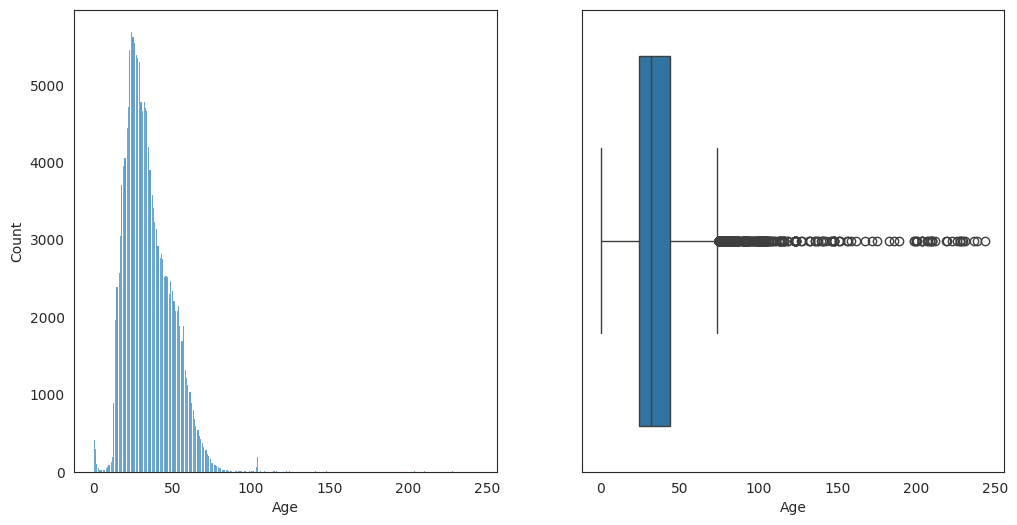

In [ ]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=user_df)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=user_df)



*  Most of the users are from the age group 25-50
*  it is highly unlikely to have users under the age of 4 and above 100.The peaks near 0 and 100 in the kdeplot indicates that there are some outlier values in the 'Age' column



**replacing the outliers in 'Age' with NaN value**

In [ ]:
user_df.loc[(user_df['Age'] > 95) | (user_df['Age'] < 4), 'Age' ]= np.nan

Calculate mean age and Fill missing values with mean age

In [ ]:
mean_age = user_df['Age'].mean()
user_df['Age'].fillna(mean_age, inplace=True)

percentage of missing values in 'Age' column

In [ ]:
(user_df['Age'].isnull().sum()/ len(user_df)*100)

0.0

**Now let's inspect the 'Location' column.**

In [ ]:
top_locations = user_df['Location'].value_counts().head(10)
print('Top locations by user count : ')
print(top_locations)

Top locations by user count : 
Location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain                  1400
vancouver, british columbia, canada    1359
Name: count, dtype: int64


number of unique values in 'Location'

In [ ]:
len(user_df['Location'].unique())   #user_df['Location'].nunique()

57339


Extracting country names from the "Location" column

In [ ]:
user_df['Country'] = user_df['Location'].str.extract(r'\,+\s?(\w*\s?\w*)\"*$')     #user_df['Country'] = user_df['Location'].str.split(',').str[-1].str.strip()


In [ ]:
user_df['Country']

0                    usa
1                    usa
2                 russia
3               portugal
4         united kingdom
               ...      
278853               usa
278854    united kingdom
278855            canada
278856               usa
278857           ireland
Name: Country, Length: 278858, dtype: object

In [ ]:
top_country = user_df['Country'].value_counts().head(5)
print('Top countries by user count: ')
print(top_country)

Top countries by user count: 
Country
usa               139712
canada             21658
united kingdom     18556
germany            17073
spain              13258
Name: count, dtype: int64


# **Ratings data**

displaying the first 5 rows

In [ ]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


checking null values

In [ ]:
rating_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

checking for unique user ids and isbn values

In [ ]:
unique_user_ids = rating_df['User-ID'].nunique()
unique_isbn_values = rating_df['ISBN'].nunique()
print("Number of unique user ids is", unique_user_ids, "and ISBN no. is", unique_isbn_values)

Number of unique user ids is 105283 and ISBN no. is 340556


This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.

checking for duplicates

In [ ]:
rating_df[rating_df.duplicated()].sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: object

lets see if all the books in rating_df are also in books_df

In [ ]:
rating_df_new = rating_df[rating_df['ISBN'].isin(book_df['ISBN'])]

In [ ]:
rating_df_shape = rating_df.shape
rating_df_new_shape = rating_df_new.shape
print("Shape of rating_df:", rating_df_shape, "and rating_df_new:", rating_df_new_shape)

Shape of rating_df: (1149780, 3) and rating_df_new: (1030617, 3)


1149780 - 030617 = 119163 , there are 119163 ISBN number is not there in Book dataset

In [ ]:
rating_df_new.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
rating_df_new['Book-Rating'].value_counts().reset_index()

,Book-Rating,count
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374


In [ ]:
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585


but this contains both explicit and implicit rating, so we need to seperate them to get better idea.

In [ ]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [ ]:
explicit_shape = explicit_rating.shape
implicit_shape = implicit_rating.shape
print("Shape of explicit rating:", explicit_shape, "and implicit rating:", implicit_shape)

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


most purchased books including the implicitely rated books

In [ ]:
implicit_rating.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0060928336', '0385504209',
       '044023722X', '067976402X', '0440214041', '0312195516',
       '0804106304', '0375727345'], dtype=object)

getting the book names corresponding to these ISBNs

In [ ]:
isbn_nums = ['0971880107', '0316666343', '0060928336', '0385504209',
       '044023722X', '067976402X', '0440214041', '0312195516',
       '0804106304', '0375727345']
book_df[book_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
67,0804106304,The Joy Luck Club,AMY TAN,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...
305,044023722X,A Painted House,JOHN GRISHAM,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
1922,067976402X,Snow Falling on Cedars,DAVID GUTERSON,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...
2445,0440214041,The Pelican Brief,JOHN GRISHAM,1993.0,Dell,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...
4430,0375727345,House of Sand and Fog,ANDRE DUBUS III,2000.0,Vintage Books,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...


most popular explicitely rated books

In [ ]:
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


getting the explicit rated book names corresponding to these ISBNs

In [ ]:
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
book_df[book_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


therefore the most popular book is 'The Lovely Bones: A Novel'


In [ ]:
merged_df = pd.merge(book_df, explicit_rating, on = 'ISBN')
df_new = pd.merge(merged_df, user_df, on = 'User-ID')

In [ ]:
df_new

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",34.734222,canada
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,"timmins, ontario, canada",34.734222,canada
2,0887841740,The Middle Stories,SHEILA HETI,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,"timmins, ontario, canada",34.734222,canada
3,1552041778,Jane Doe,R. J. KAISER,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5,"timmins, ontario, canada",34.734222,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),LOREN D. ESTLEMAN,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,8,6,"timmins, ontario, canada",34.734222,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383688,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,FRIEDRICH WILHELM NIETZSCHE,2000.0,Edaf,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,246590,6,"madrid, madrid, spain",20.000000,spain
383689,087004124X,Anthem,AYN RAND,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.000000,usa
383690,158243123X,A Student of Weather,ELIZABETH HAY,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.000000,usa
383691,8485900057,Rimas y leyendas (ClÃÂ¡sicos Fraile ; 3),GUSTAVO ADOLFO BÃÂ©CQUER,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,"madrid, madrid, spain",22.000000,spain


In [ ]:
df_new.shape

(383693, 13)

In [ ]:
df_new.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               1
Year-Of-Publication       0
Publisher                 0
Image-URL-S               0
Image-URL-M               0
Image-URL-L               1
User-ID                   0
Book-Rating               0
Location                  0
Age                       0
Country                7180
dtype: int64

In [ ]:
df_new.duplicated().sum()

0

In [ ]:

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383693 entries, 0 to 383692
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383693 non-null  object 
 1   Book-Title           383693 non-null  object 
 2   Book-Author          383692 non-null  object 
 3   Year-Of-Publication  383693 non-null  float64
 4   Publisher            383693 non-null  object 
 5   Image-URL-S          383693 non-null  object 
 6   Image-URL-M          383693 non-null  object 
 7   Image-URL-L          383692 non-null  object 
 8   User-ID              383693 non-null  int64  
 9   Book-Rating          383693 non-null  int64  
 10  Location             383693 non-null  object 
 11  Age                  383693 non-null  float64
 12  Country              376513 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 38.1+ MB


In [ ]:
df_new['Year-Of-Publication'] = df_new['Year-Of-Publication'].astype(int)

# **Exploratory data analysis**

Top 10 Books read by the users.

<Axes: title={'center': 'Most Read Books'}, xlabel='Count', ylabel='Book'>

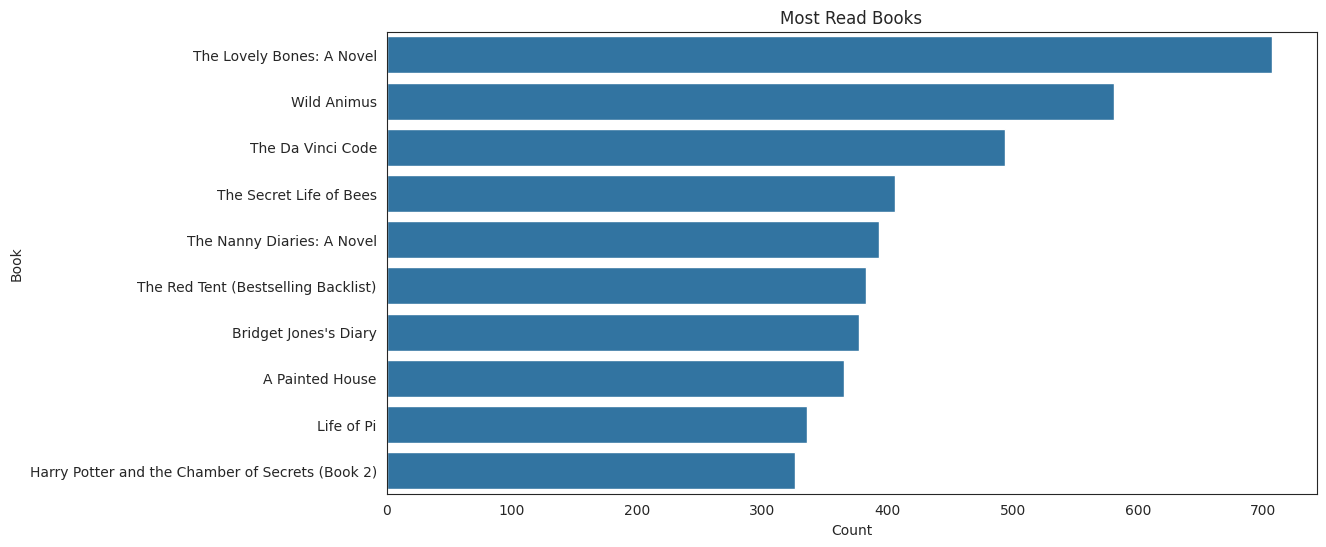

In [ ]:
most_read_books = df_new['Book-Title'].value_counts().reset_index()
most_read_books.columns = ['Book','Count']
plt.figure(figsize=(12,6))
plt.title('Most Read Books')
sns.barplot(x = 'Count', y = 'Book', data = most_read_books.head(10))

Top 10. publisher

<Axes: xlabel='Count', ylabel='Publisher'>

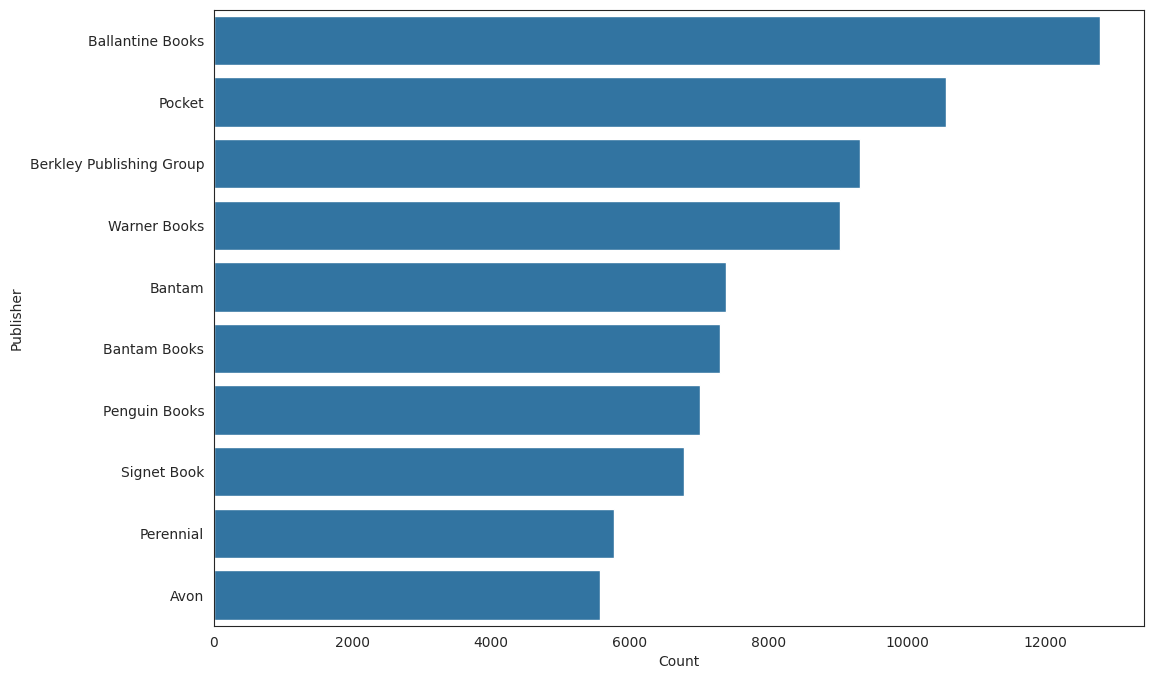

In [ ]:
top_publishers = df_new['Publisher'].value_counts().reset_index()
top_publishers.columns = ['Publisher' , 'Count']
top_publishers = top_publishers.sort_values('Count', ascending = False)
plt.figure(figsize = (12,8))
sns.barplot(x = 'Count', y = 'Publisher', data = top_publishers.head(10))

**Most popular rating**

<ipython-input-81-1fbffaa4e1a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x='Book-Rating',palette='Set2')


<Axes: title={'center': '\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

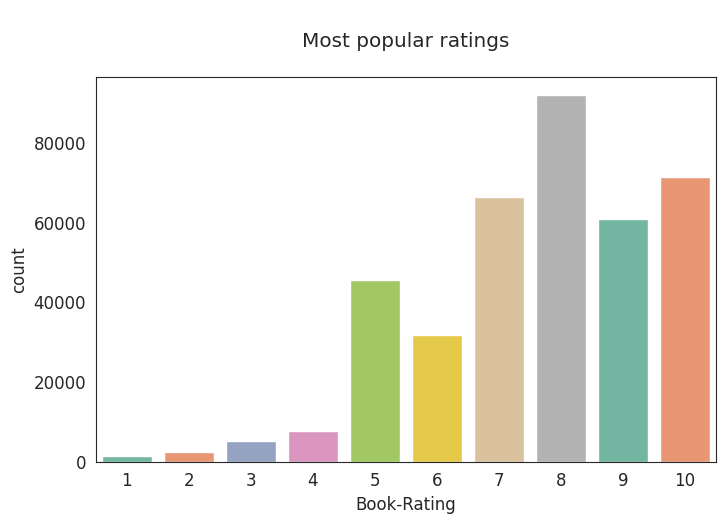

In [ ]:
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=df_new, x='Book-Rating',palette='Set2')



*   Most of users have given above 4 ratings to books
*  8 is the most common rating given by users



**Most popular book authors**

<ipython-input-82-4b0b17254fd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')


<Axes: title={'center': '\nMost popular Authors\n'}, xlabel='Book-Rating', ylabel='Book-Author'>

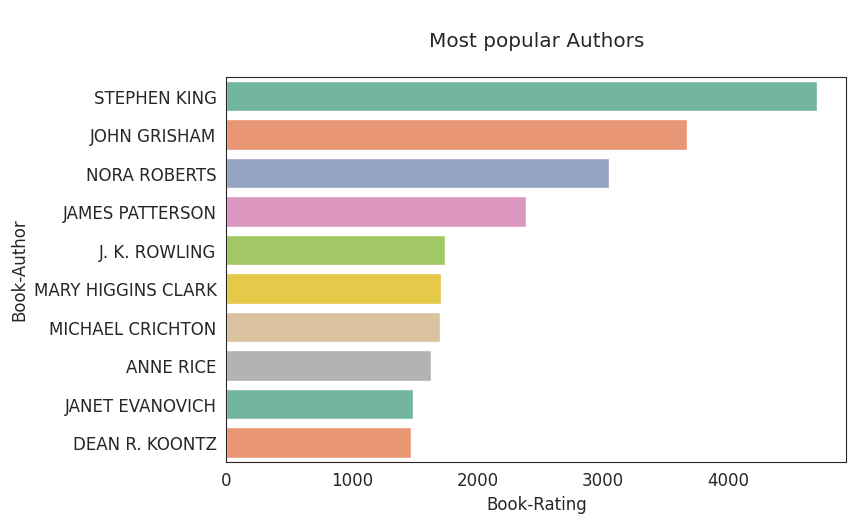

In [ ]:
author = df_new.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by= 'Book-Rating', ascending = False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

**countries with most readers**

<ipython-input-83-0300357ea825>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')


Text(0.5, 0, 'No of users')

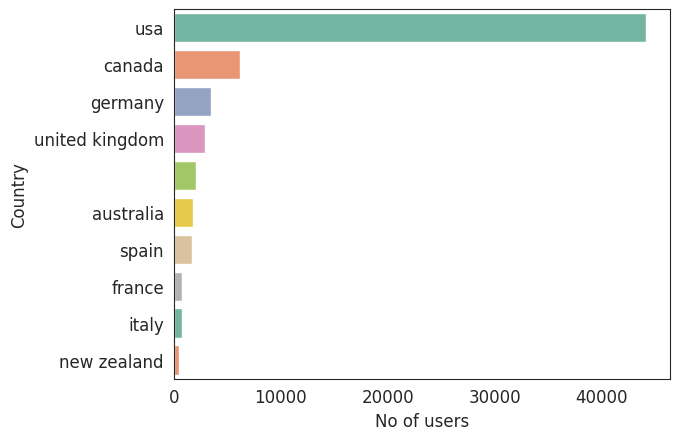

In [ ]:
countries = df_new.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')
plt.xlabel('No of users')



*   Most of the readers are from the United States




**Numbers of users according to the age**

<Axes: title={'center': 'Numbers of users according to the age'}, xlabel='Age', ylabel='Count'>

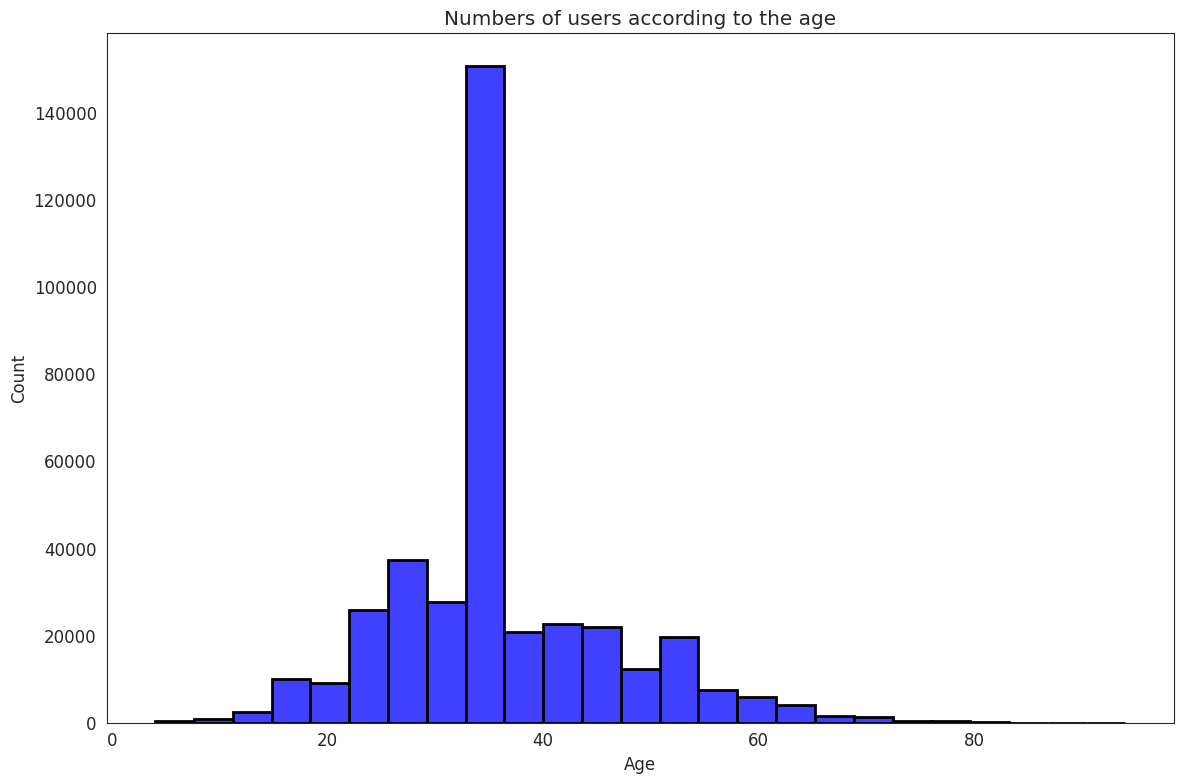

In [ ]:
user_age = df_new.Age
plt.figure(figsize=(12,8), tight_layout=True)
plt.title('Numbers of users according to the age')
sns.histplot(user_age, bins = 25, linewidth = 2, color = 'blue', edgecolor = 'black')



*  The majority of readers are between the ages of 25 and 40.
*   Readers who are 80 to 100 years old make up a tiny minority.



# **EDA CONCLUSION**



*   The Lovely Bones: A Novel and Wild Animus are the two most read books.

*   Ballantine Books and Pocket are the top publishers based on the number of ratings that their books have received.

*  8 is the most common rating given by users
*  Most popular book author based on the number of ratings is Stephan King .


*   The majority of readers who have given the books ratings are from the United States and Canada.*


*  The majority of readers are between the ages of 20 and 40.



# **Model Building**

**Recommendation Systems**

In [ ]:
rating_with_name=rating_df.merge(book_df,on='ISBN')

Top Rating based recommendation system.

In [ ]:
def most_popular(df_new,n):
  if n >= 1 and n <= len(df_new):
    popular = df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by = 'Book-Rating', ascending = False).head(n)
    return pd.merge(popular, book_df, on= 'ISBN')
  return('Please enter a valid value on n!')

In [ ]:
most_popular(df_new,5)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,707,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0971880107,581,Wild Animus,RICH SHAPERO,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,0385504209,487,The Da Vinci Code,DAN BROWN,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0312195516,383,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


Country-based book recommendation

In [ ]:
def country_popular(df_new, country):
  if country in list(df_new.Country.unique()):
    return most_popular(df_new[df_new['Country'] == country], 5) # calling most_popular function to get popular recommendations
  return 'This country is not present in the dataset. Please enter some other country.'

In [ ]:
country_popular(df_new, 'usa')

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,531,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0385504209,393,The Da Vinci Code,DAN BROWN,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
2,0312195516,301,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
3,0971880107,299,Wild Animus,RICH SHAPERO,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
4,0142001740,271,The Secret Life of Bees,SUE MONK KIDD,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...


Author based recommender system

In [ ]:
def author_based(book_title,number,df_relevant_data=df_relevant_data):
  '''
  To recommend books from the same author as the book entered by the user
  '''
  author=df_relevant_data.loc[df_relevant_data['Book-Title']==book_title]['Book-Author'].unique()[0]
  author_df=df_relevant_data.loc[(df_relevant_data['Book-Author']==author)].sort_values(by='weighted_average',ascending=False)
  print(f'The author of the book {book_title} is {author}\n')
  print(f'Here are the top {number} books from the same author\n')
  top_rec=author_df.loc[(author_df['Book-Title']!=book_title),['Book-Title','weighted_average']].head(number)
  return(top_rec)

**Collaborative Filtering Based Recommendation System.**

Collaborative filtering techniques create a model based on past user activity (items previously purchased, movies viewed and rated, etc.) as well as usage choices made by both current and past users. Then, this model is used to predict the ratings for items or items themselves that the user might be interested in.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
rating_with_name=rating_df.merge(book_df,on='ISBN')

In [ ]:
df_collab = rating_with_name.groupby('User-ID').count()['Book-Title'] > 200
df_user = df_collab[df_collab].index

In [ ]:
filtered_rating = rating_with_name[rating_with_name['User-ID'].isin(df_user)]
filtered_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. ROSE,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. ROSE,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. ROSE,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. ROSE,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. ROSE,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
df_famous = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >=50
famous_book = df_famous[df_famous].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_book)]

In [ ]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,NICHOLAS SPARKS,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,NICHOLAS SPARKS,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,NICHOLAS SPARKS,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,NICHOLAS SPARKS,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,NICHOLAS SPARKS,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026350,266865,0531001725,10,The Catcher in the Rye,JEROME DAVID SALINGER,1973.0,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027546,269566,0670809381,0,Echoes,MAEVE BINCHY,1986.0,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028400,271284,0440910927,0,The Rainmaker,JOHN GRISHAM,1995.0,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1028693,271705,B0001PIOX4,0,Fahrenheit 451,RAY BRADBURY,1993.0,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [ ]:
df_pt = final_ratings.pivot_table(index = 'Book-Title',columns = 'User-ID', values='Book-Rating' )

In [ ]:
df_pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
df_pt.fillna(0, inplace = True)
df_pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similarity_scores = cosine_similarity(df_pt)
similarity_scores.shape

(706, 706)

In [ ]:
def recommend(book_name):
  index = np.where(df_pt.index==book_name)[0][0]
  similar_items  = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse = True)[1:6]

  data = []
  for i in similar_items:
   item = []
   final_df = df_new[df_new['Book-Title'] == df_pt.index[i[0]]]
   item.extend(list(final_df.drop_duplicates('Book-Title')['Book-Title'].values))
   item.extend(list(final_df.drop_duplicates('Book-Title')['Book-Author'].values))
   item.extend(list(final_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

   data.append(item)

  return data

In [ ]:
recommend('1984')

[['Animal Farm',
  'GEORGE ORWELL',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'MARGARET ATWOOD',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'ALDOUS HUXLEY',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'MICHAEL CUNNINGHAM',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [ ]:
df_pt.index[545]

"The Handmaid's Tale"

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
book_df.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,MARK P. O. MORFORD,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,CARLO D'ESTE,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,GINA BARI KOLATA,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. BARBER,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271041,0449906736,Flashpoints: Promise and Peril in a New World,ROBIN WRIGHT,1993.0,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271043,0525447644,From One to One Hundred,TERI SLOAT,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271044,006008667X,Lily Dale : The True Story of the Town that Ta...,CHRISTINE WICKER,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271045,0192126040,Republic (World's Classics),PLATO,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


# import pickle
from pickle import dump
filename = 'popular.pkl'
pickle.dump(popular_df,open(filename,'wb'))
filename = 'df_pt.pkl'
pickle.dump(df_pt,open(filename,'wb'))
filename = 'similarity_scores.pkl'
pickle.dump(similarity_scores,open(filename,'wb'))

In [ ]:
from google.colab import files
files.download('popular.pkl')
files.download('df_pt.pkl')
files.download('similarity_scores.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()